In [1]:


import time
import re
import pylab as pl
import numpy as np

from datetime import datetime, timedelta

import subprocess

import os
import time
from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor

from joblib import Parallel, delayed
import time
import numpy as np
import shutil


In [2]:
%config NotebookApp.iopub_data_rate_limit=10000000000

In [3]:

def str2datetime(s):
    parts = s.split('.')
    dt = datetime.strptime(parts[0], "%Y-%m-%d %H:%M:%S")
    return dt.replace(microsecond=int(parts[1]))


def remove_outliers(x, outlierConstant = 1.5):
    a = np.array(x)
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    resultList = []
    removedList = []
    for y in a.tolist():
        if y >= quartileSet[0] and y <= quartileSet[1]:
            resultList.append(y)
        else:
            removedList.append(y)
    return (resultList, removedList)
def getThroughput(experiment):

    result = subprocess.check_output('cat '+experiment+'/nohup_client_*', shell=True)
#     print(result)

    result = result.decode("utf-8") 

    lines = result.split('\n')

    commit_pat = re.compile('([^[].*) \[hotstuff info\] ([0-9.]*)$')
#     commit_pat = re.compile('([^[].*) \[hotstuff info\] got*')

    Times = []
    lats = []

    for line in lines:
        m = commit_pat.match(line)
        if m:
            try:
#                 print(line)

                time_item = float((line.split(' ')[1]).split(':')[0])*3600 + float((line.split(' ')[1]).split(':')[1])*60 + \
                float((line.split(' ')[1]).split(':')[2])
    
#                 print(time_item)
                Times.append(time_item)        

                lats.append(float(m.group(2)))
            except:
                continue


    begin_time = None
    values = []
    interval = 1
    cnt = 0
    Times.sort()
    
#     print(Times)

    for timestamp in Times:
        if begin_time is None:
            begin_time = timestamp
            next_begin_time = timestamp +interval

        while timestamp >= next_begin_time:
            begin_time = next_begin_time
            next_begin_time += interval
            
            print(next_begin_time)
            
            values.append(cnt)
            cnt = 0
        cnt += 1
    values.append(cnt)

#     lats, _ = remove_outliers(lats)
#     print(len(values))


    return np.arange(len(values))*interval,np.array(values)/interval, lats


<>:30: SyntaxWarning: invalid escape sequence '\['
<>:30: SyntaxWarning: invalid escape sequence '\['
/tmp/ipykernel_75584/2466606622.py:30: SyntaxWarning: invalid escape sequence '\['
  commit_pat = re.compile('([^[].*) \[hotstuff info\] ([0-9.]*)$')


In [4]:
with open('all_local_ips','r') as firstfile:
    for line in firstfile:
        print(line)


127.0.0.1

127.0.0.1

127.0.0.1

127.0.0.1

127.0.0.1


In [5]:
with open('all_local_ips','r') as firstfile, open('all_external_ips','w') as secondfile:
      
    # read content from first file
    for line in firstfile:
        print(line)

        secondfile.write(line)
        
        
with open('all_local_ips','r') as firstfile, open('all_internal_ips','w') as secondfile:
      
    # read content from first file
    for line in firstfile:

        secondfile.write(line)

127.0.0.1

127.0.0.1

127.0.0.1

127.0.0.1

127.0.0.1


In [6]:
import subprocess

In [7]:
nclients = 1
nnodes = 4

In [8]:
f = open('all_external_ips', "r")
data1 = [line.strip() for line in f.readlines()]

In [9]:
f = open('all_internal_ips', "r")
data2 = [line.strip() for line in f.readlines()]

In [10]:
data2, len(data2)

(['127.0.0.1', '127.0.0.1', '127.0.0.1', '127.0.0.1', '127.0.0.1'], 5)

In [11]:
data = []

In [12]:
# for i in range(len(data1)):
#     if data1[i]!='None':
# #         data.append(data1[i] + '    ' + data2[i])
#         data.append('127.0.0.1'+ '    ' + '127.0.0.1')
    

skip_instances = 0
    
for i in range(skip_instances, len(data1)):
    if data1[i]!='None':
        data.append(data1[i] + '    ' + data2[i])
#         data.append('127.0.0.1'+ '    ' + '127.0.0.1')

In [13]:
data, len(data)

(['127.0.0.1    127.0.0.1',
  '127.0.0.1    127.0.0.1',
  '127.0.0.1    127.0.0.1',
  '127.0.0.1    127.0.0.1',
  '127.0.0.1    127.0.0.1'],
 5)

In [14]:
with open('replicas.txt', 'w') as f:
    for line in data[:nnodes]:
        f.write("%s\n" % line)

In [15]:
data, len(data)

(['127.0.0.1    127.0.0.1',
  '127.0.0.1    127.0.0.1',
  '127.0.0.1    127.0.0.1',
  '127.0.0.1    127.0.0.1',
  '127.0.0.1    127.0.0.1'],
 5)

In [16]:
nclients

1

In [17]:
with open('clients.txt', 'w') as f:
    for line in data[nnodes:]:
        f.write("127.0.0.1\n")       

In [18]:
with open('all_external_ips') as f:
    lines = f.read().splitlines()


lines = [x for x in lines if x!='None']
lines


['127.0.0.1', '127.0.0.1', '127.0.0.1', '127.0.0.1', '127.0.0.1']

In [19]:
len(lines)

5

In [20]:
experiment = '../temp'

In [21]:
os.system('cd ../temp; echo 3108 | sudo -S  rm *')

[sudo] password for tejas: 

0

In [22]:
node_list = list(range(len(lines)))

node_list_server = node_list[:nnodes]
node_list_client = node_list[-nclients:]

node_list_server, node_list_client


([0, 1, 2, 3], [4])

In [23]:
nnodes

4

In [75]:
os.system('echo 3108 | sudo -S killall hotstuff-app')
os.system('echo 3108 | sudo -S killall hotstuff-client')
os.system('echo 3108 | sudo -S killall nohup')


[sudo] password for tejas: hotstuff-app: no process found
[sudo] password for tejas: hotstuff-client: no process found
[sudo] password for tejas: nohup: no process found


256

In [76]:
os.system('echo 3108 | sudo -S sh job_mini.sh '+ experiment)

[sudo] password for tejas: CMake Warning:
  No source or binary directory provided.  Both will be assumed to be the
  same as the current working directory, but note that this warning will
  become a fatal error in future CMake releases.


CMake Deprecation Warning at CMakeLists.txt:16 (cmake_minimum_required):
  Compatibility with CMake < 3.10 will be removed from a future version of
  CMake.

  Update the VERSION argument <min> value.  Or, use the <min>...<max> syntax
  to tell CMake that the project requires at least <min> but has been updated
  to work with policies introduced by <max> or earlier.


CMake Deprecation Warning at salticidae/CMakeLists.txt:23 (cmake_minimum_required):
  Compatibility with CMake < 3.10 will be removed from a future version of
  CMake.

  Update the VERSION argument <min> value.  Or, use the <min>...<max> syntax
  to tell CMake that the project requires at least <min> but has been updated
  to work with policies introduced by <max> or earlier.




Name of TestRun: ../temp
-- Found OpenSSL: /usr/lib/x86_64-linux-gnu/libcrypto.so (found suitable version "3.4.1", minimum required is "1.1.0")
-- Found OpenSSL: /usr/lib/x86_64-linux-gnu/libcrypto.so (found version "3.4.1")
-- Could NOT find Doxygen (missing: DOXYGEN_EXECUTABLE) 
-- Configuring done (0.1s)
-- Generating done (0.0s)
-- Build files have been written to: /home/tejas/work/O2PRBC
[ 21%] Built target libsecp256k1
[ 24%] Building CXX object CMakeFiles/hotstuff.dir/src/hotstuff.cpp.o
[ 48%] Built target salticidae
[ 51%] Built target salticidae_static
[ 54%] Built target salticidae_shared


In file included from /home/tejas/work/O2PRBC/salticidae/include/salticidae/network.h:29,
                 from /home/tejas/work/O2PRBC/include/hotstuff/hotstuff.h:26,
                 from /home/tejas/work/O2PRBC/src/hotstuff.cpp:18:
/home/tejas/work/O2PRBC/salticidae/include/salticidae/crypto.h: In member function ‘void salticidae::SHA256::reset()’:
/home/tejas/work/O2PRBC/salticidae/include/salticidae/crypto.h:45:25: warning: ‘int SHA256_Init(SHA256_CTX*)’ is deprecated: Since OpenSSL 3.0 [-Wdeprecated-declarations]
   45 |         if (!SHA256_Init(&ctx))
      |              ~~~~~~~~~~~^~~~~~
In file included from /home/tejas/work/O2PRBC/salticidae/include/salticidae/crypto.h:32:
/usr/include/openssl/sha.h:73:27: note: declared here
   73 | OSSL_DEPRECATEDIN_3_0 int SHA256_Init(SHA256_CTX *c);
      |                           ^~~~~~~~~~~
/home/tejas/work/O2PRBC/salticidae/include/salticidae/crypto.h: In member function ‘void salticidae::SHA256::update(const uint8_t*, size_t)’:
/ho

[ 67%] Built target hotstuff
[ 72%] Linking CXX static library libhotstuff.a
[ 72%] Linking CXX shared library libhotstuff.so
[ 72%] Built target hotstuff_static
[ 75%] Linking CXX executable hotstuff-tls-keygen
[ 78%] Linking CXX executable hotstuff-keygen
[ 81%] Linking CXX executable test_secp256k1
[ 81%] Built target hotstuff_shared
[ 83%] Linking CXX executable hotstuff-app
[ 86%] Built target test_secp256k1
[ 89%] Built target hotstuff-tls-keygen
[ 91%] Built target hotstuff-keygen
[ 94%] Linking CXX executable hotstuff-client
[ 97%] Built target hotstuff-app
[100%] Built target hotstuff-client


0

In [77]:
        
def run_node(i):
    ip = lines[i]
#     if ip!='None' and( ip in nodeIps[:-3]):
    if ip!='None' and ip in lines[:nnodes]:

        current = (ip.split('.'))
        command = 'echo 3108 | sudo -S nohup ../../examples/hotstuff-app --conf hotstuff.gen-sec'+str(i)+'.conf > ../temp/nohup_'+str(i)+'.out 2>&1 &'

        print(command)
        os.system(command)
        
        





results = Parallel(n_jobs=len(lines))(delayed(run_node)(i) for i in [0,1,2,3])

print(results)


time.sleep(10)

[None, None, None, None]


In [78]:
def run_client(i):
    ip = lines[i]
    client_no = i - nnodes
    if ip!='None' and( ip in lines[nnodes:]):
        
        current = (ip.split('.'))
        command = 'echo 3108 | sudo -S nohup ../../examples/hotstuff-client --idx '+str(client_no)+' --iter -1 --max-async 10 > ../temp/nohup_client_'+str(i)+'.out 2>&1 &'
        
        print(command)
        os.system(command)



results = Parallel(n_jobs=len(lines))(delayed(run_client)(i) for i in [4])

time.sleep(40)
# os.system('echo 3108 | sudo -S killall hotstuff-client')


# def run_client(i):
#     ip = lines[i]
#     client_no = i - nnodes
#     if ip!='None' and( ip in lines[nnodes:]):
        
#         current = (ip.split('.'))
#         command = 'echo 3108 | sudo -S nohup ../../examples/hotstuff-client --idx '+str(client_no)+' --iter -1 --max-async 1 > ../temp/nohup_client_'+str(i+1)+'.out 2>&1 &'
        
#         print(command)
#         os.system(command)
        
# time.sleep(20)
# results = Parallel(n_jobs=len(lines))(delayed(run_client)(i) for i in [4])
# time.sleep(40)


In [79]:
def kill_node(node_number):
    # Command to find the process running the node
    command = f"ps aux | grep 'hotstuff.gen-sec{node_number}.conf' | grep -v grep"
    process = subprocess.run(command, shell=True, capture_output=True, text=True)

    if process.stdout.strip():
        # Extract the PID (assumes PID is the second column)
        pid = process.stdout.split()[1]
        print(f"Killing process {pid} for node {node_number}")
        os.system(f"kill {pid}")
    else:
        print(f"No process found for node {node_number}")

In [80]:
# kill_node(4)

In [81]:
# results = Parallel(n_jobs=len(lines))(delayed(run_node)(i) for i in [4])

# print(results)

In [82]:
# def run_client(i):
#     ip = lines[i]
#     client_no = i - nnodes
#     if ip!='None' and( ip in lines[nnodes:]):
        
#         current = (ip.split('.'))
#         command = 'echo 3108 | sudo -S nohup ../../examples/hotstuff-client --idx '+str(client_no)+' --iter 1 --max-async 1 > ../temp/nohup_client_'+str(i)+'.out 2>&1 &'
        
#         print(command)
#         os.system(command)



# results = Parallel(n_jobs=len(lines))(delayed(run_client)(i) for i in [5])

# time.sleep(5)


In [83]:
# time.sleep(35)

In [84]:
os.system('echo 3108 | sudo -S killall hotstuff-client')


os.system('echo 3108 | sudo -S killall hotstuff-app')
os.system('echo 3108 | sudo -S killall nohup')

[sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: nohup: no process found


256

In [85]:
time.sleep(10)

In [86]:
X,Y, lats = getThroughput(experiment)
print(np.sum(Y)/len(Y), np.average(lats))

13345.315746
13346.315746
13347.315746
13348.315746
13349.315746
13350.315746
13351.315746
13352.315746
13353.315746
13354.315746
13355.315746
13356.315746
13357.315746
13358.315746
13359.315746
13360.315746
13361.315746
13362.315746
13363.315746
13364.315746
13365.315746
13366.315746
13367.315746
13368.315746
13369.315746
13370.315746
13371.315746
13372.315746
13373.315746
13374.315746
13375.315746
13376.315746
13377.315746
13378.315746
13379.315746
13380.315746
13381.315746
13382.315746
13383.315746
13384.315746
3359.512195121951 0.0028551478728038333


In [87]:
X,Y

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 array([3430., 3306., 3374., 3220., 3280., 3280., 3280., 3350., 3342.,
        3218., 3360., 3247., 3513., 3640., 3520., 3390., 3300., 3360.,
        3350., 3360., 3370., 3210., 3210., 3470., 3150., 3250., 3412.,
        3548., 3581., 3649., 3650., 3710., 3562., 3568., 3700., 3540.,
        3730., 3670., 3671., 3719.,  250.]))

In [88]:
lats

[0.002677,
 0.002715,
 0.002737,
 0.002769,
 0.002812,
 0.002838,
 0.002868,
 0.002898,
 0.002937,
 0.002981,
 0.002472,
 0.002504,
 0.002511,
 0.002505,
 0.002559,
 0.00257,
 0.002574,
 0.002575,
 0.002648,
 0.002657,
 0.002878,
 0.002892,
 0.002881,
 0.002868,
 0.002802,
 0.002791,
 0.002788,
 0.002793,
 0.0027,
 0.002697,
 0.003279,
 0.003304,
 0.003308,
 0.003307,
 0.003301,
 0.003296,
 0.003272,
 0.003257,
 0.003243,
 0.003223,
 0.003894,
 0.003927,
 0.003926,
 0.003929,
 0.003933,
 0.003926,
 0.003928,
 0.00393,
 0.003945,
 0.003946,
 0.003127,
 0.003159,
 0.003163,
 0.003162,
 0.003164,
 0.003162,
 0.003164,
 0.003158,
 0.003158,
 0.003157,
 0.002429,
 0.002727,
 0.002753,
 0.002753,
 0.00275,
 0.002769,
 0.002779,
 0.002796,
 0.002828,
 0.002855,
 0.002863,
 0.002597,
 0.002623,
 0.002634,
 0.002637,
 0.002633,
 0.002634,
 0.002621,
 0.002605,
 0.002602,
 0.002656,
 0.002674,
 0.002688,
 0.002696,
 0.002692,
 0.002693,
 0.0027,
 0.002692,
 0.002677,
 0.002667,
 0.003096,
 0.003

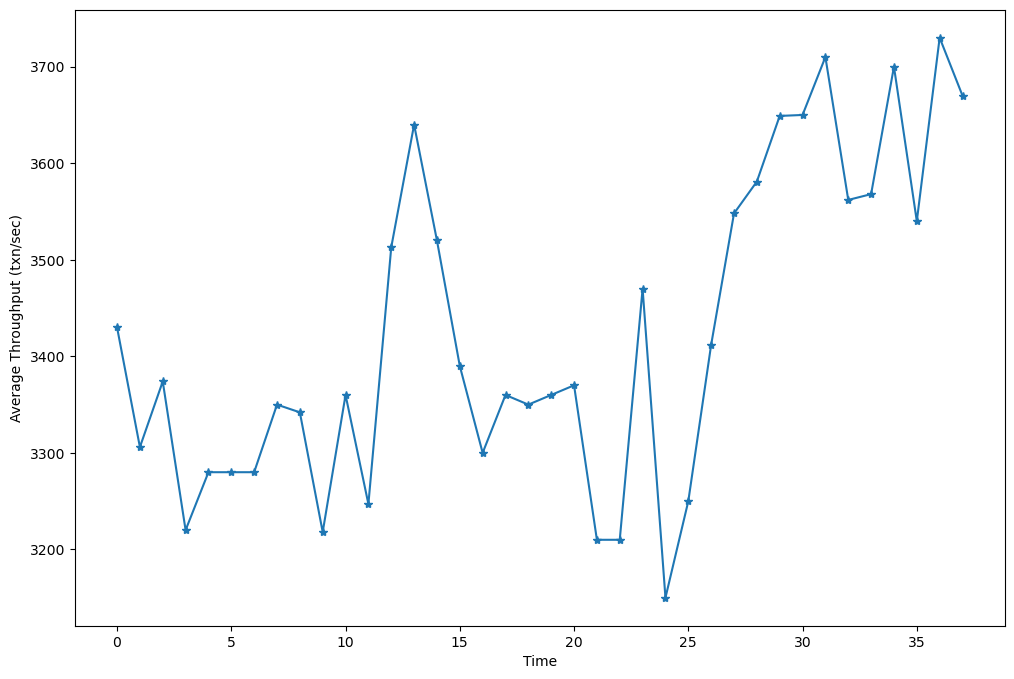

<Figure size 640x480 with 0 Axes>

In [89]:
fig = pl.figure(figsize = (12, 8))
fig.patch.set_facecolor('white')
pl.plot(X[:-3],Y[:-3], '-*')
# pl.plot(X[:-1],np.cumsum(Y[:-1])*np.average(Y[:-1])/np.sum(Y[:-1]), '-*')

pl.xlabel('Time')
pl.ylabel('Average Throughput (txn/sec)')
# pl.title('HotStuff Multicluster: 3 clusters with remove view change timeout = 4 seconds')

# pl.ylim(0,1000)
# pl.savefig('/home/tejas/Desktop/remote_view_change.png', dpi =150, bbox_inches = 0 )
pl.show()
pl.clf()


# fig = pl.figure(figsize = (12, 8))
# fig.patch.set_facecolor('white')
# # pl.plot(X[:-1],Y[:-1], '-*')
# pl.plot(X[:-3],np.cumsum(Y[:-3]), '-*')

# pl.xlabel('Time (sec)')
# pl.ylabel('Throughput (txn/sec)')
# # pl.title('HotStuff Multicluster: 3 clusters with remove view change timeout = 4 seconds')

# # pl.ylim(0,1000)
# # pl.savefig('/home/tejas/Desktop/remote_view_change.png', dpi =150, bbox_inches = 0 )
# pl.show()
# pl.clf()

In [90]:
# pl.figure(figsize=(8, 6))
# pl.hist(1000*lats[::30], bins=100, color='blue', edgecolor='black', alpha=0.7)  # Adjust bins as needed
# pl.xlabel('Latency (ms)', fontsize=12)
# pl.ylabel('Count', fontsize=12)
# pl.title('Histogram of Latencies', fontsize=14)
# pl.grid(axis='y', alpha=0.75)
# pl.show()


In [91]:
np.average(lats)

0.0028551478728038333

echo 3108 | sudo -S nohup ../../examples/hotstuff-app --conf hotstuff.gen-sec1.conf > ../temp/nohup_1.out 2>&1 &
echo 3108 | sudo -S nohup ../../examples/hotstuff-app --conf hotstuff.gen-sec2.conf > ../temp/nohup_2.out 2>&1 &
echo 3108 | sudo -S nohup ../../examples/hotstuff-app --conf hotstuff.gen-sec2.conf > ../temp/nohup_2.out 2>&1 &
echo 3108 | sudo -S nohup ../../examples/hotstuff-app --conf hotstuff.gen-sec2.conf > ../temp/nohup_2.out 2>&1 &
echo 3108 | sudo -S nohup ../../examples/hotstuff-app --conf hotstuff.gen-sec3.conf > ../temp/nohup_3.out 2>&1 &
echo 3108 | sudo -S nohup ../../examples/hotstuff-app --conf hotstuff.gen-sec3.conf > ../temp/nohup_3.out 2>&1 &
echo 3108 | sudo -S nohup ../../examples/hotstuff-app --conf hotstuff.gen-sec3.conf > ../temp/nohup_3.out 2>&1 &
echo 3108 | sudo -S nohup ../../examples/hotstuff-app --conf hotstuff.gen-sec1.conf > ../temp/nohup_1.out 2>&1 &
echo 3108 | sudo -S nohup ../../examples/hotstuff-app --conf hotstuff.gen-sec1.conf > ../temp/no